## ASSIGNMENT NO.: 10
### Text Mining
#### Name: Shinde Harshada Babasaheb
#### Roll NO.: 23107119
#### Class: TY-B
#### Batch: B

In [1]:
!pip install spacy vaderSentiment rake-nltk nltk pandas
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/14.2 MB ? eta -:--:--
    --------------------------------------- 0.3/14.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.2 MB 670.4 kB/s eta 0:00:21
   - -------------------------------------- 0.5/14.2 MB 670.4 kB/s eta 0:00:21
   -- ------------------------------------- 0.8/14.2 MB 671.3 kB/s eta 0:00:21
   -- ------------------------------------- 0.8/14.2 MB 671.3 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/14.2 MB 629.1 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/14.2 MB 629.1 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/14.2 MB 629.1 kB/s eta 0:00:21
   -- ------------------------------------- 1.0/14.2 MB 629.1 kB/s eta 0:00:21
   -- ----

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 270.8 kB/s eta 0:00:46
     - ------------------------------------- 0.5/12.8 MB 270.8 kB/s eta 0:00:46
     - ------------------------------------- 0.5/12.8 MB 270.8 kB/s eta 0:00:46
     - ------------------------------------- 0.5/12.8 MB 270.8 kB/s eta 0:00:46
     -- ------------------

In [11]:
import pandas as pd 
import re 
import string 
import nltk 
import spacy

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from rake_nltk import Rake
from nltk.corpus import stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Babasaheb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
df = pd.read_csv("../Downloads/data.csv")

In [15]:
df

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
...,...,...
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5


In [17]:
df.isnull().sum()

review    0
rating    0
dtype: int64

In [19]:
df.dtypes

review    object
rating     int64
dtype: object

In [21]:
nlp = spacy.load("en_core_web_sm")

In [23]:
def spacy_preprocess(text):
    doc = nlp(str(text).lower())
    tokens = [
        token.lemma_
        for token in doc
        if token.is_alpha and not token.is_stop
    ]
    return " ".join(tokens)

In [25]:
df["clean_review"] = df["review"].apply(spacy_preprocess)
df[["review", "clean_review"]].head()

,review,clean_review
0,It was nice produt. I like it's design a lot. ...,nice produt like design lot easy carry look
1,awesome sound....very pretty to see this nd th...,awesome sound pretty nd sound quality good wis...
2,awesome sound quality. pros 7-8 hrs of battery...,awesome sound quality pro hrs battery life inc...
3,I think it is such a good product not only as ...,think good product quality design good m produ...
4,awesome bass sound quality very good bettary l...,awesome bass sound quality good bettary long l...


In [27]:
analyzer = SentimentIntensityAnalyzer()

In [29]:
def get_sentiment(text):
    compound = analyzer.polarity_scores(text)["compound"]

    if compound >= 0.05:
        return "Positive"
    elif compound <= -0.05:
        return "Negative"
    else:
        return "Neutral"

In [31]:
df["Sentiment"] = df["clean_review"].apply(get_sentiment)
df[["clean_review", "Sentiment"]].head()

,clean_review,Sentiment
0,nice produt like design lot easy carry look,Positive
1,awesome sound pretty nd sound quality good wis...,Positive
2,awesome sound quality pro hrs battery life inc...,Positive
3,think good product quality design good m produ...,Positive
4,awesome bass sound quality good bettary long l...,Positive


In [35]:
df["Sentiment"].value_counts()

Sentiment
Positive    6955
Neutral     2263
Negative     758
Name: count, dtype: int64

In [37]:
rake = Rake()

In [39]:
def extract_keywords(text):
    rake.extract_keywords_from_text(text)
    return rake.get_ranked_phrases()

In [41]:
df["Keywords"] = df["clean_review"].apply(extract_keywords)
df[["clean_review", "Keywords"]].head()

,clean_review,Keywords
0,nice produt like design lot easy carry look,[nice produt like design lot easy carry look]
1,awesome sound pretty nd sound quality good wis...,[awesome sound pretty nd sound quality good wi...
2,awesome sound quality pro hrs battery life inc...,[awesome sound quality pro hrs battery life in...
3,think good product quality design good m produ...,[product january pandamic situation useful hel...
4,awesome bass sound quality good bettary long l...,[awesome bass sound quality good bettary long ...


In [43]:
for _, row in df.iterrows():
    print("Original Review:", row["review"])
    print("Preprocessed Review:", row["clean_review"])
    print("Sentiment:", row["Sentiment"])
    print("Preferences (Keywords):", row["Keywords"])
    print("-" * 80)

Original Review: It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE
Preprocessed Review: nice produt like design lot easy carry look
Sentiment: Positive
Preferences (Keywords): ['nice produt like design lot easy carry look']
--------------------------------------------------------------------------------
Original Review: awesome sound....very pretty to see this nd the sound quality was too good I wish to take this product loved this product 😍😍😍READ MORE
Preprocessed Review: awesome sound pretty nd sound quality good wish product love product read
Sentiment: Positive
Preferences (Keywords): ['awesome sound pretty nd sound quality good wish product love product read']
--------------------------------------------------------------------------------
Original Review: awesome sound quality. pros 7-8 hrs of battery life (including 45 mins approx call time)Awesome sound output. Bass and treble are really very clear without equaliser. With equalis

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [45]:
pip install wordcloud matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [55]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [61]:
text = " ".join(df["clean_review"])

In [105]:
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap = "inferno",
    max_words=100
).generate(text)

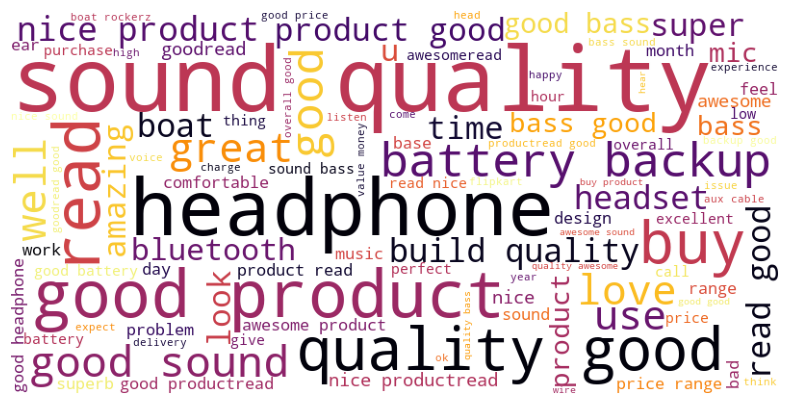

In [106]:
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()